## ➤ Read Data & Quick Overview

In [1]:
# import snscrape.modules.twitter as sntwitter

# # Creating list to append tweet data to
# tweets_list1 = []

# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:POTUS').get_items()):
#     if i>2000:
#         break
#     tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# # Creating a dataframe from the tweets list above 
# df = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Biden2000.csv", index_col=0)
df.head()

,Datetime,Tweet Id,Text,Username
0,2022-02-13 19:04:00+00:00,1492937617826058250,Good luck to the @RamsNFL and @Bengals in toni...,POTUS
1,2022-02-13 14:27:59+00:00,1492868159220731908,This is Joshua. He’s 12 years old and living w...,POTUS
2,2022-02-12 20:02:00+00:00,1492589827191197705,"This week, I met with CEOs to discuss how Buil...",POTUS
3,2022-02-11 22:28:16+00:00,1492264247648210946,I spoke today with transatlantic leaders to di...,POTUS
4,2022-02-11 18:04:39+00:00,1492197908694851587,Here’s the deal: We can lower the cost of pres...,POTUS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  2001 non-null   object
 1   Tweet Id  2001 non-null   int64 
 2   Text      2001 non-null   object
 3   Username  2001 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.2+ KB


In [5]:
df = df[['Datetime','Text']]
df.head()

,Datetime,Text
0,2022-02-13 19:04:00+00:00,Good luck to the @RamsNFL and @Bengals in toni...
1,2022-02-13 14:27:59+00:00,This is Joshua. He’s 12 years old and living w...
2,2022-02-12 20:02:00+00:00,"This week, I met with CEOs to discuss how Buil..."
3,2022-02-11 22:28:16+00:00,I spoke today with transatlantic leaders to di...
4,2022-02-11 18:04:39+00:00,Here’s the deal: We can lower the cost of pres...


## ➤ Show the Most @ and Hashtags

In [6]:
from collections import Counter

In [7]:
mentions = []
hashtags = []

for t in df['Text']:

    for token in t.split(" "):
        if token.startswith("@"):
            mentions.append(token)
        if token.startswith("#"):
            hashtags.append(token)

In [8]:
mentions_counts = Counter(mentions)
mentions_counts = sorted(mentions_counts.items(), key = lambda x:x[1], reverse = True)
top10_mentions = pd.Series(dict(mentions_counts[:10]))

In [9]:
hashtag_counts = Counter(hashtags)
hashtag_counts = sorted(hashtag_counts.items(), key = lambda x:x[1], reverse = True)
top10_hashtags = pd.Series(dict(hashtag_counts[:10]))

In [10]:
print("Top 10 Mentions:")
top10_mentions

Top 10 Mentions:


@FLOTUS          7
@VP              3
@Bucks           2
@SenSchumer      2
@TeamUSA.        2
@JoeBiden        2
@RamsNFL         1
@Bengals         1
@billieeilish    1
@finneas         1
dtype: int64

In [11]:
print("Top 10 Hashtags:")
top10_hashtags

Top 10 Hashtags:


#BackTogether            2
#GoBolts                 1
#VaxLive                 1
#TransDayofVisibility    1
dtype: int64

## ➤ Calculate the Average Length of Biden's Tweets

In [12]:
import nltk

In [13]:
df["Length"] = df['Text'].apply(nltk.word_tokenize).apply(len)
np.round(df['Length'].mean(), 0)

40.0

In [14]:
df.drop('Length', axis=1, inplace=True)

## ➤ Show the Time when Biden Tweets in a Day

In [15]:
hour = []
for dt in df['Datetime']:
    hour.append(int(dt.split(" ")[1][:2]))

hour_counts = Counter(hour)
hour_counts = sorted(hour_counts.items(), key = lambda x:x[0], reverse = False)
hour_counts = pd.Series(dict(hour_counts))

Text(0.5, 0, 'Hour')

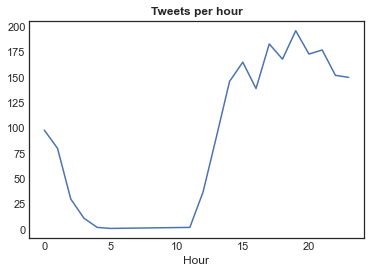

In [16]:
plt.plot(hour_counts.index, hour_counts.values)
plt.title("Tweets per hour", weight="bold")
plt.xlabel("Hour")

## ➤ Clean Data

In [17]:
from textblob import Word
from textblob import TextBlob

from nltk.corpus import stopwords
stopword_list = stopwords.words("english")

import re

In [18]:
# lower texts
df['Text'] = df['Text'].apply(lambda x: \
        ' '.join(x.lower() for x in x.split()))

# Remove symbols
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

# Lemmatize
df['Text'] = df['Text'].apply(lambda x: \
        ' '.join([Word(word).lemmatize() for word in x.split()]))

# Remove stop words
df['Text'] = df['Text'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in stopword_list and len(x)>2))

In [19]:
df[['Datetime']] = df[['Datetime']].astype(str)

for i, t in enumerate(df['Datetime']):

    df['Datetime'][i] = str(t)[:10]

In [20]:
df.head()

,Datetime,Text
0,2022-02-13,good luck ramsnfl bengal tonight super bowl fl...
1,2022-02-13,joshua year old living type diabetes like coun...
2,2022-02-12,week met ceo discus build back better lower en...
3,2022-02-11,spoke today transatlantic leader discus concer...
4,2022-02-11,deal lower cost prescription drug child care h...


## ➤ Show Sentiment Distribution of Biden's Tweets

In [21]:
# Add Sentiment column
df['Sentiment'] = df['Text'].apply(lambda x: \
        10 * np.round(TextBlob(x).sentiment[0],3))

In [22]:
sns.set(style="ticks",
    rc={
        "figure.figsize": [12, 7],
        "text.color": "white",
        "axes.labelcolor": "white",
        "axes.edgecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.facecolor": "#5C0E10",
        "figure.facecolor": "#5C0E10"}
    )
import matplotlib.pyplot as plt

In [23]:
colors = np.array([(0.811, 0.913, 0.145)]*len(df["Sentiment"]))
colors[df["Sentiment"] >= 0] = (0.529, 0.870, 0.972)

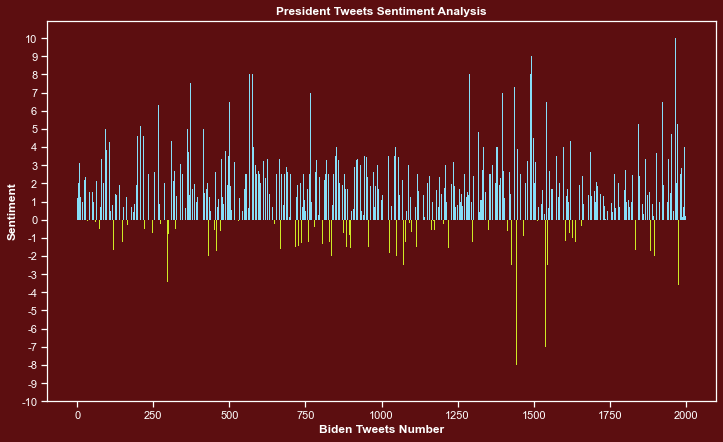

In [24]:
plt.bar(df.index, df["Sentiment"], color=colors, linewidth=0)
yticks_labels = [f"{np.round(i,0)}" for i in np.arange(-10, 11, 1)]
plt.yticks(np.arange(-10, 11, 1), yticks_labels)
plt.xlabel("Biden Tweets Number", weight = "bold")
plt.ylabel("Sentiment", weight = "bold")
plt.title("President Tweets Sentiment Analysis", fontweight="bold")
plt.show()

## ➤ Show Word Frequency in Biden's Tweets

In [25]:
tweet_stop_word = ["today",'day','one','thats','every','time','back','america','american']

In [26]:
all_words = []

for t in df['Text']:
    for w in t.split(" "):
        if w not in tweet_stop_word:
            all_words.append(w)

In [27]:
word_counts_all_time = Counter(all_words)
word_counts_all_time = sorted(word_counts_all_time.items(), key = lambda x:x[1], reverse = True)
word_counts_all_time = pd.Series(dict(word_counts_all_time))

In [28]:
top20word = word_counts_all_time[:20]
top20word

get               319
job               304
build             299
year              288
better            286
infrastructure    286
people            245
family            222
plan              212
bipartisan        197
million           191
make              186
nation            186
country           180
going             169
need              168
vaccinated        168
economy           165
tune              164
work              160
dtype: int64

In [29]:
from wordcloud import WordCloud
from PIL import Image

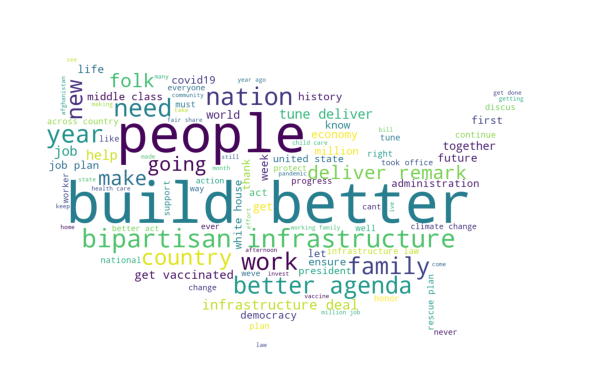

In [30]:
plt.style.use("seaborn-white")
wordcloud = WordCloud(mask = np.array(Image.open("america.png")), max_words = 100,
                          background_color = "white",
                          stopwords = stopwords.words('english'),
                      min_font_size = 8).generate(" ".join(all_words))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

## ➤ Decompose Time Series of Biden's Tweets

In [31]:
from typing import List, Dict, Optional
from collections import Counter, defaultdict

In [32]:
# Use this dict to remember the count of each token in each daydaily_counts[]
# usage: daily_counts[date_string][token_string], e.g. daily_counts['2020-04-01']['covid19']
daily_counts = defaultdict(dict)

# Use this dict to remember the mininum count among all token in each day
# this dict is used to fill the missing value if one token does not appear in some other date
daily_min_counts = {}

In [33]:
for dt in df.Datetime.unique():
    
    # to store daily tokens later
    daily_tokens = []

    # get every text
    for text in df[df["Datetime"] == dt]['Text']:

        # clean and append tokens
        for token in text.split(" "):
            daily_tokens.append(token)

    # get tokens count    
    daily_word_count = Counter(daily_tokens)
    daily_word_count = sorted(daily_word_count.items(), key = lambda x:x[1], reverse = True)
    
    for word_count_pair in daily_word_count:
        daily_counts[dt][word_count_pair[0]] = word_count_pair[1]
    
    daily_min_counts[dt] = min(daily_word_count)[1]

In [34]:
# This counter is used to figure out each token's highest count (i.e., all time high count)
terms_counter = Counter()

In [35]:
for dt in df.Datetime.unique():
    
    # get every text
    for pair in daily_counts[dt].items():
        
        if terms_counter[pair[0]] < pair[1]:
                    terms_counter[pair[0]] = pair[1]

In [36]:
print(f'Number of eligible tokens: {len(terms_counter)}')
print(f'Top 5 tokens with counts:\n{terms_counter.most_common(5)}')

Number of eligible tokens: 5427
Top 5 tokens with counts:
[('framework', 16), ('america', 14), ('infrastructure', 13), ('year', 12), ('american', 12)]


In [37]:
# See the mininum count on 2022-03-22
daily_min_counts['2022-02-01']

1

In [38]:
# Use Counter.most_common(N) function to select topN eligible tokens
topN = 50
selected_tokens = [x for x, _ in terms_counter.most_common(topN)]

In [39]:
selected_tokens[:20]

['framework',
 'america',
 'infrastructure',
 'year',
 'american',
 'child',
 'bipartisan',
 'tax',
 'united',
 'day',
 'get',
 'right',
 'drug',
 'job',
 '100',
 'vaccinated',
 'build',
 'back',
 'better',
 'prescription']

In [40]:
# This timeseries variable stores all the tokens and their timeseries in key, value format
timeseries = defaultdict(list)

# Since all the timeseries should have same timetamps range, put them into this `ts_idx` list
ts_idx = []

In [41]:
for dt in df.Datetime.unique():
    
    ts_idx.append(dt)
    
    for token in selected_tokens:
        # construct the timeseries using `daily_counts`
        # if a token does not have count for that date,
        # use that day's minimum count minus 1 to fill it
        try:
            timeseries[token].append(daily_counts[dt][token])
        except:
            timeseries[token].append(daily_min_counts[dt])

In [42]:
print(ts_idx[:10])
print(len(ts_idx))

['2022-02-13', '2022-02-12', '2022-02-11', '2022-02-10', '2022-02-09', '2022-02-08', '2022-02-07', '2022-02-06', '2022-02-05', '2022-02-04']
325


In [43]:
# Have a look of raw time-series for token `infrastructure`
print(timeseries['infrastructure'])

[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 4, 7, 7, 10, 4, 2, 1, 1, 4, 4, 3, 4, 9, 1, 2, 2, 1, 2, 1, 1, 1, 1, 4, 2, 5, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 3, 1, 3, 1, 2, 3, 4, 1, 1, 3, 1, 2, 6, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 2, 1, 1, 5, 2, 1, 1, 5, 13, 4, 1, 2, 4, 5, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1]


In [44]:
def plot_ts(ts: List[float], labels: List[str] = None) -> None:
    if not labels:
        labels = list(range(len(ts)))
    plt.plot(labels, ts)
    plt.grid()
    plt.xlabel('date')
    plt.ylabel('# of appearance')
    plt.show()

def token_trend(token: str):
    plot_ts(timeseries[token])

In [45]:
import statsmodels.api as sm
from statsmodels.robust.scale import mad
from scipy.stats import t as student_t

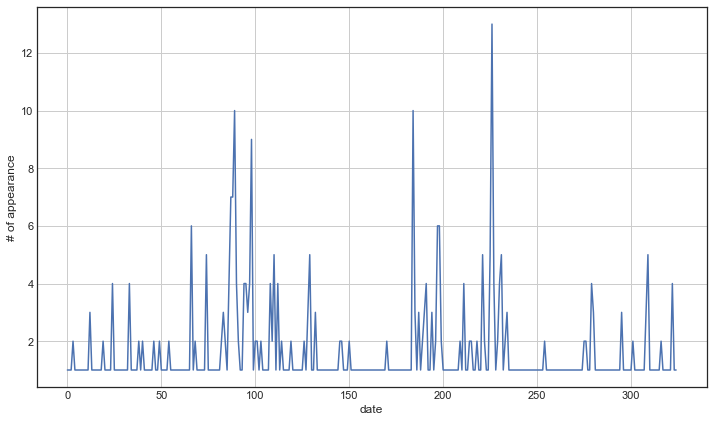

In [46]:
token_trend('infrastructure')

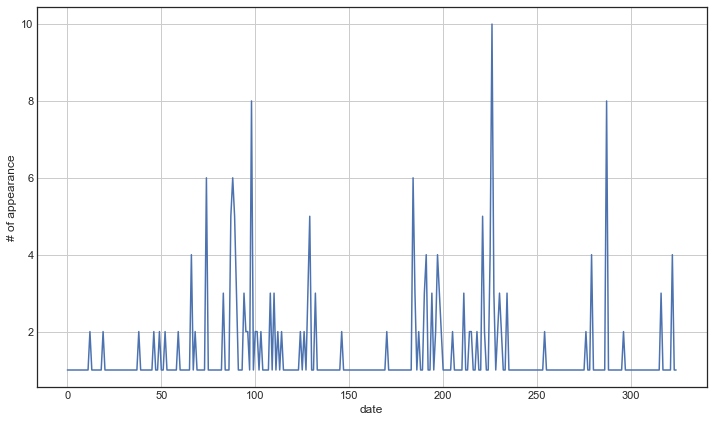

In [47]:
token_trend('bipartisan')

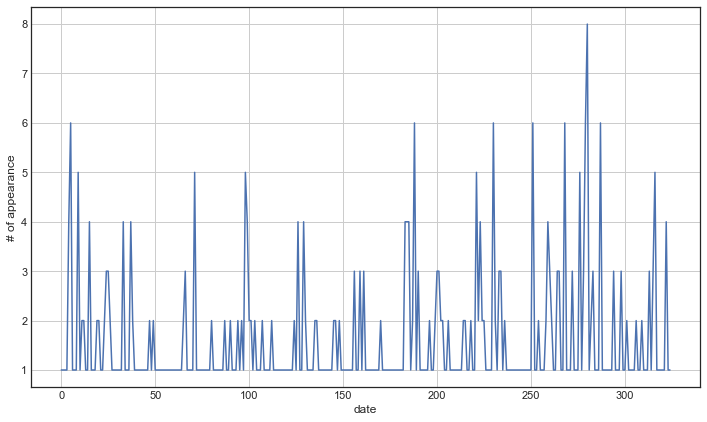

In [48]:
token_trend('job')

In [49]:
def stl(series: np.ndarray, period: int):
    """
    Seasonal-Trend decomposition
    series : numpy.array
        Time-series in ndarry
    periood : int
        Period of the seasonal component.
        For example, if the  time series is monthly with a yearly cycle, then
        freq=12.
    """
    decomp = sm.tsa.seasonal_decompose(series, period=period)
    return decomp.seasonal, decomp.trend, decomp.resid

In [50]:
seasonal, trend, resid = stl(np.array(timeseries['infrastructure']), period=7)

Original Timeseries


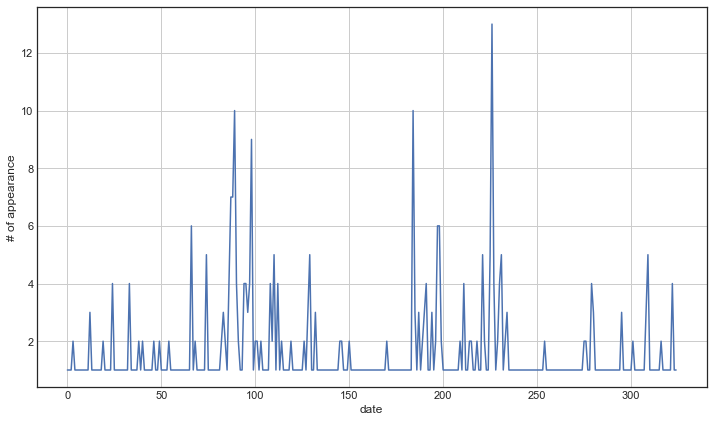

Seasonal Component


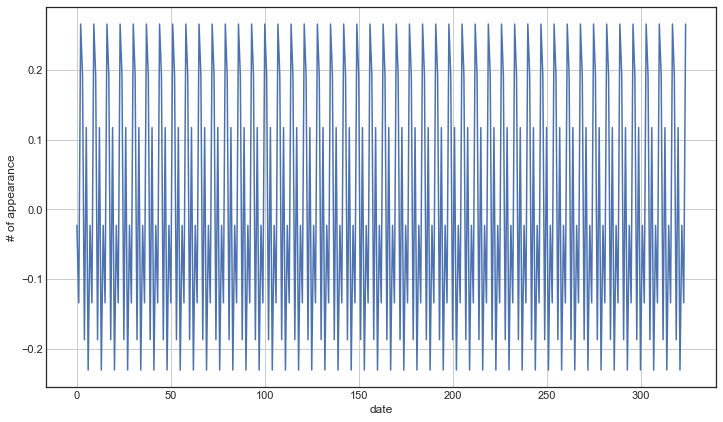

Trend Component


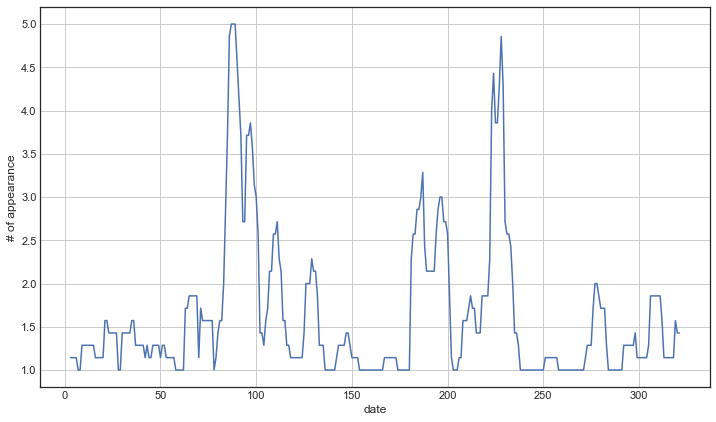

Residual Component


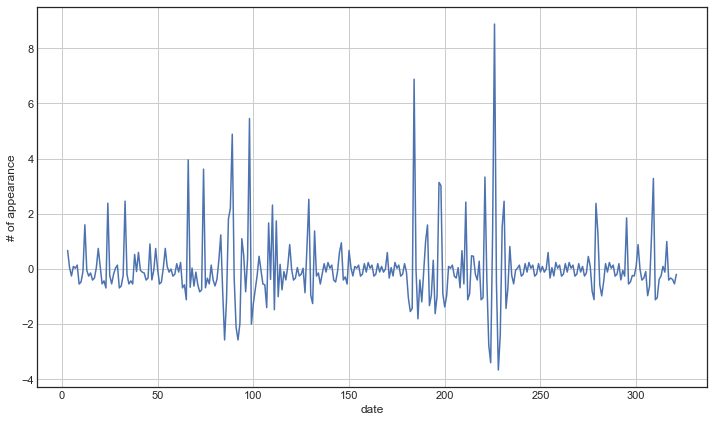

In [51]:
print('Original Timeseries')
plot_ts(timeseries['infrastructure'])
print('Seasonal Component')
plot_ts(seasonal)
print('Trend Component')
plot_ts(trend)
print('Residual Component')
plot_ts(resid)

## ➤ Detect Anomalies in Biden's Post - Seasonal Hybrid ESD

In [52]:
from statsmodels.robust.scale import mad
from scipy.stats import t as student_t
import math

In [53]:
def robust_seasonal_esd_test(ts, max_anom=5, seasonal=False, period=None, alpha=0.05, threshold=1.0):
    """Robust Seasonal Extreme Studentized Deviate Test"""
  
    series = np.copy(ts)
    if len(ts) != len(ts_idx):
        print(f"Bad timeseries, length={len(ts)}")
        return []
    
    # Implement the seasonal decomposition as an option
    if seasonal:
        if not period:
            raise RuntimeError("Period must be set if the time series is seasonal")
        # Remove the seasonal signal and median (based on the paper)
        series = series - stl(ts, period=7)[0] - np.median(series)
    
    N = len(series)
    ts_index = np.array(range(N))
    
    anom_list = []
    n_anom = 0
    for k in range(1, max_anom+1):
        
        # Compute the test statistic C_k
        C_k = max(abs(series-np.median(series)))/mad(series)
        
        # Determine the direction or anomaly
        direction = ("positive" if max(abs(series-np.median(series))) in series-np.median(series) else "negative")
        
        # Compute the critical value
        p = 1 - alpha / (2 * (N - k + 1))
        t = student_t.ppf(p, N - k - 1)
        lambda_k = (N - k) * t / ((N - k - 1+ t**2)*(N - k +1))**0.5


        # The score is defined as C_k / lambda_k
        # If the score > threshold, then take this data point as an anomaly
        score = C_k / lambda_k
        if score > threshold:
            n_anom = k
        else:
            break
        
        max_idx = np.argmax(abs(series-np.median(series)))
        
        anom_list.append({
            "rank": k,
            "index": int(ts_index[max_idx]),
            "value": float(ts[ts_index[max_idx]]),
            "direction": direction,
            "score": round(score, 2)
        })
            
        # Remove the identified value from both time-series and index
        series = np.delete(series, max_idx)
        ts_index = np.delete(ts_index, max_idx)
    return anom_list

In [54]:
def plot_anomaly_on_ts(ts: List[float], anom_index_list: List[int], anom_value_list: List[int]) -> None:
    
    #Plot timeseries chart together with detected anomalies as scatter points
    #ts:The values of timeseries
    
    #anom_index_list:The list of timeseries index for the detected anomalies, for instance, if the 2nd data point
    # is identified as anomaly, the index will be 1 (since it starts from 0)
    
    #anom_value_list:The list of values for the detected anomalies
    
    labels = list(range(len(ts)))
    plt.plot(labels, ts)
    plt.scatter(anom_index_list, anom_value_list, s=50.0, c='red')
    plt.grid()
    plt.xlabel('date')
    plt.ylabel('# of appearance')
    plt.show()

def pretty_print(struct):

    print(json.dumps(struct, indent=2))

In [55]:
def plot_anomalies(term):
    
    ts = np.array(timeseries[term])
    anom_list = robust_seasonal_esd_test(ts, threshold=1.1)

    # Only keep anomalies going up
    anom_index = []
    anom_value = []

    for i in anom_list:
        if i['direction'] == 'positive':
            anom_index.append(i['index'])
            anom_value.append(i['value'])

    plot_anomaly_on_ts(ts, anom_index, anom_value)

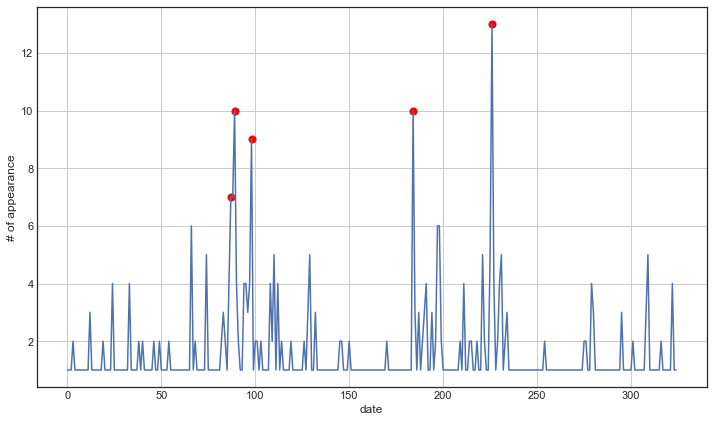

In [56]:
plot_anomalies("infrastructure")

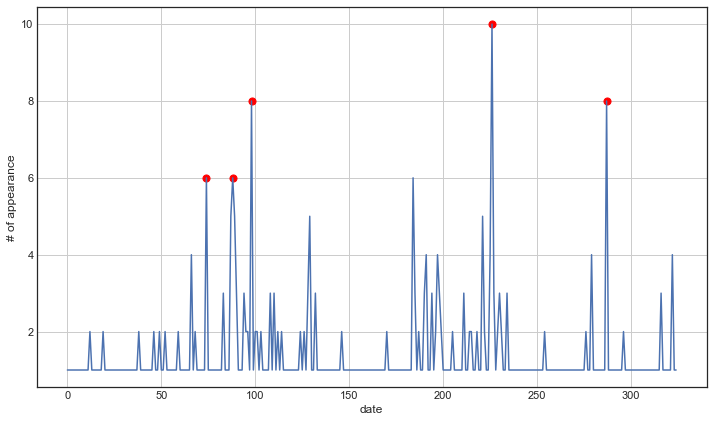

In [57]:
plot_anomalies("bipartisan")

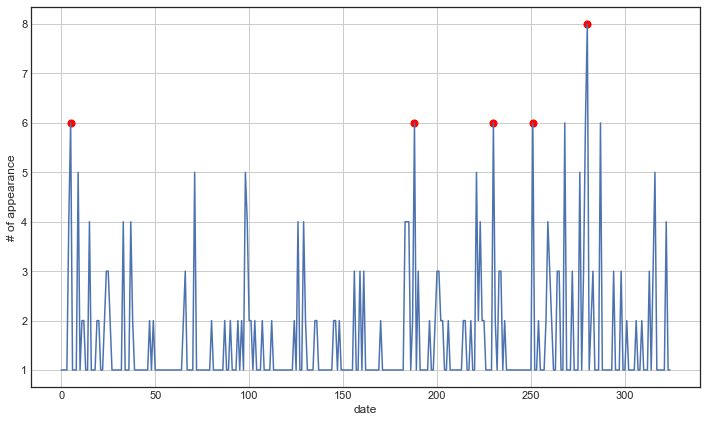

In [58]:
plot_anomalies("job")

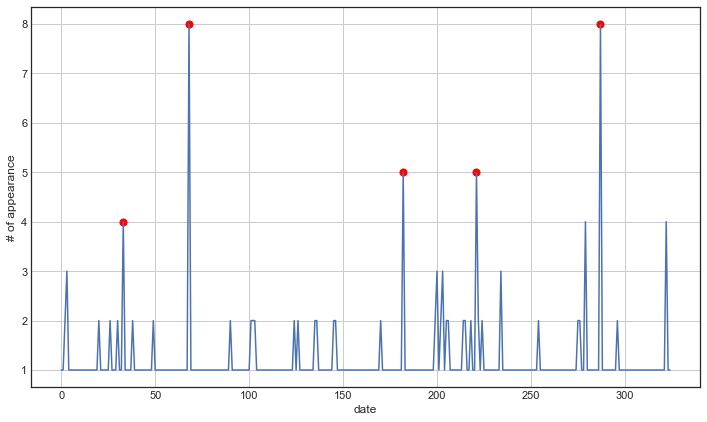

In [59]:
plot_anomalies("drug")

In [60]:
# I will use this dict to remember the anomalous token for each date
# format: daily_anom_tokens[date_string][anomalous_token] = anom_dict_from_the_algorithm
daily_anom_tokens = defaultdict(dict)

In [61]:
all_tokens = timeseries.keys()

In [62]:
for token in all_tokens:
    ts = np.array(timeseries[token])
    anom_list = robust_seasonal_esd_test(ts, threshold=1.1)

In [63]:
daily_anom_tokens = defaultdict(dict)

all_tokens = timeseries.keys()

for token in all_tokens:
    
    # Apply positive anomaly detection for the timeseries of all tokens.
    ts = np.array(timeseries[token])
    anom_list = robust_seasonal_esd_test(ts, threshold=1.1)
    
    anom_index = []
    anom_value = []
    
    for i in anom_list:
        if i['direction'] == 'positive':
            
            anom_index.append(i['index'])
            anom_value.append(i['value'])
    
    for idx, value in zip(anom_index, anom_value):
        daily_anom_tokens[ts_idx[idx]][token] = value

In [64]:
# Show top tearms by date
for date in sorted(daily_anom_tokens.keys()):
    
    ordered_tokens = sorted(daily_anom_tokens[date].items(), 
                                           key=lambda item:item[1], 
                                           reverse=True)
    print(date)
    for token, score in ordered_tokens:
        space = ' '*(27-len(token))
        print(f'{token}{space}{score}')
    print()

2021-03-24
every                      5.0

2021-03-25
day                        6.0
united                     4.0
100                        4.0
justice                    4.0
state                      4.0
pay                        4.0
every                      4.0

2021-03-31
american                   8.0
right                      4.0

2021-04-08
gun                        5.0

2021-04-22
climate                    7.0

2021-04-29
america                    14.0
american                   12.0
day                        9.0
framework                  8.0
child                      8.0
bipartisan                 8.0
get                        8.0
drug                       8.0
100                        8.0
vaccinated                 8.0
build                      8.0
prescription               8.0
deal                       8.0
price                      8.0
law                        8.0
climate                    8.0
cancer                     8.0
agenda                     8

In [66]:
daily_anom_tokens['2021-05-06']

{'job': 8.0, 'plan': 6.0}

- May 06, 2021 [Biden falsely claims infrastructure plan will create 16 million jobs](https://www.foxnews.com/politics/fact-check-biden-claims-2t-infrastructure-plan-will-create-16m-jobs)

In [76]:
daily_anom_tokens['2021-04-08']

{'gun': 5.0}

- April 08, 2021 [Middle Tennessee reacts to Biden's gun control action](https://www.wsmv.com/news/middle-tennessee-reacts-to-bidens-gun-control-action/article_fc3af6f6-98d7-11eb-9109-db71d35ddc46.html)

In [65]:
daily_anom_tokens['2021-12-06']

{'drug': 8.0,
 'prescription': 7.0,
 'price': 7.0,
 'need': 4.0,
 'act': 6.0,
 'lower': 5.0,
 'cost': 5.0}

- December 06, 2021 [Remarks by President Biden on Prescription Drug Costs](https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/12/06/remarks-by-president-biden-on-prescription-drug-costs/)

## ➤ Real Events Validation

- May 06, 2021 [Biden falsely claims infrastructure plan will create 16 million jobs](https://www.foxnews.com/politics/fact-check-biden-claims-2t-infrastructure-plan-will-create-16m-jobs)

- April 08, 2021 [Middle Tennessee reacts to Biden's gun control action](https://www.wsmv.com/news/middle-tennessee-reacts-to-bidens-gun-control-action/article_fc3af6f6-98d7-11eb-9109-db71d35ddc46.html)

- December 06, 2021 [Remarks by President Biden on Prescription Drug Costs](https://www.whitehouse.gov/briefing-room/speeches-remarks/2021/12/06/remarks-by-president-biden-on-prescription-drug-costs/)

## ➤ Topic Modelings - Find 5 Main Topics in Biden's Tweets

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [72]:
text_encoder = Pipeline([
    ('tfidf_vec', TfidfVectorizer(stop_words="english", min_df = 5, max_df = 0.9)),
    ('normalize', Normalizer()),
    ('lda', LDA(n_components = 5))], verbose=True)

In [73]:
tweet_vec = text_encoder.fit_transform(df['Text'])

[Pipeline] ......... (step 1 of 3) Processing tfidf_vec, total=   0.1s
[Pipeline] ......... (step 2 of 3) Processing normalize, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing lda, total=   2.0s


In [74]:
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [75]:
print_topics(text_encoder['lda'], text_encoder['tfidf_vec'], 10)


Topic #1:
infrastructure build better bipartisan american america agenda deal tax job

Topic #2:
year job economic office day economy took american million unemployment

Topic #3:
nation forward today house afghanistan president white life right world

Topic #4:
tune deliver remark response update vaccination covid19 day report american

Topic #5:
vaccinated vaccine covid19 shot folk today booster variant american health
